##Importing packages

In [ ]:
import os
import sys

import functools
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import np_utils
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


# from data_helpers import load_dataset
# from vgg_cbcnn import vgg_16_cbcnn


##Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing the dataset

In [ ]:
aluminium_foil = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/aluminium_foil/sample_a/*.*')
brown_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/brown_bread/sample_a/*.*')
corduroy = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/corduroy/sample_a/*.*')
cork = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cork/sample_a/*.*')
cotton = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cotton/sample_a/*.*')
cracker = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cracker/sample_a/*.*')
lettuce_leaf = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/lettuce_leaf/sample_a/*.*')
linen = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/linen/sample_a/*.*')
white_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/white_bread/sample_a/*.*')
wood = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wood/sample_a/*.*')
wool = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wool/sample_a/*.*')


# In[5]:


data = []
labels = []
j= 0
for i in aluminium_foil:
    # if j>100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    j +=1
for i in brown_bread:
    # if j>200:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    j +=1
for i in corduroy:
    # if j>300:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    j +=1
for i in cork:
    # if j>400:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    j+=1
for i in cotton:
    # if j>500 :
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    j+=1
for i in cracker:
    # if j> 600:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(5)
    j+=1
for i in lettuce_leaf:
    # if j> 700:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(6)
    j+=1
for i in linen:
    # if j> 800:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(7)
    j+=1
for i in white_bread:
    # if j> 900:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(8)
    j+=1
for i in wood:
    # if j> 1000:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(9)
    j+=1
for i in wool:
    # if j> 1100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(10)
    j+=1
print('total images = ',j)
data = np.array(data)
labels = np.array(labels)

total images =  1188


In [ ]:
aluminium_foil = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/aluminium_foil/sample_b/*.*')
brown_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/brown_bread/sample_b/*.*')
corduroy = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/corduroy/sample_b/*.*')
cork = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cork/sample_b/*.*')
cotton = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cotton/sample_b/*.*')
cracker = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cracker/sample_b/*.*')
lettuce_leaf = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/lettuce_leaf/sample_b/*.*')
linen = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/linen/sample_b/*.*')
white_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/white_bread/sample_b/*.*')
wood = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wood/sample_b/*.*')
wool = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wool/sample_b/*.*')


# In[5]:


# data = []
# labels = []
# j= 0
for i in aluminium_foil:
    # if j>100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    j +=1
for i in brown_bread:
    # if j>200:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    j +=1
for i in corduroy:
    # if j>300:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    j +=1
for i in cork:
    # if j>400:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    j+=1
for i in cotton:
    # if j>500 :
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    j+=1
for i in cracker:
    # if j> 600:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(5)
    j+=1
for i in lettuce_leaf:
    # if j> 700:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(6)
    j+=1
for i in linen:
    # if j> 800:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(7)
    j+=1
for i in white_bread:
    # if j> 900:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(8)
    j+=1
for i in wood:
    # if j> 1000:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(9)
    j+=1
for i in wool:
    # if j> 1100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(10)
    j+=1
print('total images = ',j)
# data = np.array(data)
# labels = np.array(labels)

total images =  2376


In [ ]:
aluminium_foil = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/aluminium_foil/sample_c/*.*')
brown_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/brown_bread/sample_c/*.*')
corduroy = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/corduroy/sample_c/*.*')
cork = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cork/sample_c/*.*')
cotton = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cotton/sample_c/*.*')
cracker = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cracker/sample_c/*.*')
lettuce_leaf = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/lettuce_leaf/sample_c/*.*')
linen = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/linen/sample_c/*.*')
white_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/white_bread/sample_c/*.*')
wood = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wood/sample_c/*.*')
wool = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wool/sample_c/*.*')


# In[5]:


for i in aluminium_foil:
    # if j>100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    j +=1
for i in brown_bread:
    # if j>200:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    j +=1
for i in corduroy:
    # if j>300:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    j +=1
for i in cork:
    # if j>400:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    j+=1
for i in cotton:
    # if j>500 :
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    j+=1
for i in cracker:
    # if j> 600:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(5)
    j+=1
for i in lettuce_leaf:
    # if j> 700:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(6)
    j+=1
for i in linen:
    # if j> 800:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(7)
    j+=1
for i in white_bread:
    # if j> 900:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(8)
    j+=1
for i in wood:
    # if j> 1000:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(9)
    j+=1
for i in wool:
    # if j> 1100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(10)
    j+=1
print('total images = ',j)


total images =  3564


In [ ]:
aluminium_foil = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/aluminium_foil/sample_d/*.*')
brown_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/brown_bread/sample_d/*.*')
corduroy = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/corduroy/sample_d/*.*')
cork = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cork/sample_d/*.*')
cotton = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cotton/sample_d/*.*')
cracker = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/cracker/sample_d/*.*')
lettuce_leaf = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/lettuce_leaf/sample_d/*.*')
linen = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/linen/sample_d/*.*')
white_bread = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/white_bread/sample_d/*.*')
wood = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wood/sample_d/*.*')
wool = glob.glob('/content/drive/MyDrive/PS I G3/Dataset/KTH-TIPS 2-a/KTH-TIPS2-a/wool/sample_d/*.*')




for i in aluminium_foil:
    # if j>100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    j +=1
for i in brown_bread:
    # if j>200:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    j +=1
for i in corduroy:
    # if j>300:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    j +=1
for i in cork:
    # if j>400:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    j+=1
for i in cotton:
    # if j>500 :
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    j+=1
for i in cracker:
    # if j> 600:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(5)
    j+=1
for i in lettuce_leaf:
    # if j> 700:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(6)
    j+=1
for i in linen:
    # if j> 800:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(7)
    j+=1
for i in white_bread:
    # if j> 900:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(8)
    j+=1
for i in wood:
    # if j> 1000:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(9)
    j+=1
for i in wool:
    # if j> 1100:
    #     break
    image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(10)
    j+=1
data = np.array(data)
print('total images = ',np.shape(data)[0])
labels = np.array(labels)

total images =  4608


##Splitting data and labels into test-train

In [ ]:
# X_train, X_test, y_train, y_test = data, X_test, labels, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

##Util functions

In [ ]:

def crop_img(img, height, width, cropped_height, cropped_width):

    left = (width - cropped_width) / 2
    top = (height - cropped_height) / 2
    right = (width + cropped_width) / 2
    bottom = (height + cropped_height) / 2
    img = img.crop((left, top, right, bottom))

    return img


def image_n_label_generator(list_of_files, labels_dict, no_classes,
                            resize_height=512, resize_width=512,
                            cropped_height=448, cropped_width=448):
    file_counter = 0
    np.random.shuffle(list_of_files)

    while True:

        if file_counter == len(list_of_files):
            file_counter = 0
            np.random.shuffle(list_of_files)  # So that images are taken up in refreshed order on each epoch

        filename = list_of_files[file_counter]
        file_counter += 1
        label_value = labels_dict[filename]
        one_hot_label = np_utils.to_categorical(label_value, no_classes)
        try:
            img = load_img(filename)
            img = img.resize((resize_width, resize_height))
            img = crop_img(img, resize_height, resize_width, cropped_height, cropped_width)
            img = img_to_array(img)
        except Exception as exc:
            print('Exception from image n label generator: ', str(exc))
            raise exc

        yield (img, one_hot_label)


def group_by_batch(dataset, batch_size):
    while True:
        sources, targets = zip(*[next(dataset) for i in range(batch_size)])
        sources_array = np.stack(sources)
        targets_array = np.stack(targets)

        sources_array = preprocess_input(sources_array)  # Image-net specific pre-processing
        batch = (sources_array, targets_array)
        yield batch


def load_dataset(files_list, labels_list, batch_size, no_classes, resize_height=512, resize_width=512,
                 cropped_height=448, cropped_width=448):

    labels_dict = dict(zip(files_list, labels_list))

    generator = image_n_label_generator(files_list, labels_dict, no_classes, resize_height, resize_width,
                                        cropped_height, cropped_width)

    generator = group_by_batch(generator, batch_size)
    return generator

In [ ]:
# vgg_cbcnn.py 

import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Lambda, Dense, Reshape
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import concatenate
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


 
def compact_bilinear(tensors_list,output_shape):

    def _generate_sketch_matrix(rand_h, rand_s, output_dim):
        """
        Return a sparse matrix used for tensor sketch operation in compact bilinear
        pooling
        Args:
            rand_h: an 1D numpy array containing indices in interval `[0, output_dim)`.
            rand_s: an 1D numpy array of 1 and -1, having the same shape as `rand_h`.
            output_dim: the output dimensions of compact bilinear pooling.
        Returns:
            a sparse matrix of shape [input_dim, output_dim] for tensor sketch.
        """

        # Generate a sparse matrix for tensor count sketch
        rand_h = rand_h.astype(np.int64)
        rand_s = rand_s.astype(np.float32)
        assert (rand_h.ndim == 1 and rand_s.ndim == 1 and len(rand_h) == len(rand_s))
        assert (np.all(rand_h >= 0) and np.all(rand_h < output_dim))

        input_dim = len(rand_h)
        indices = np.concatenate((np.arange(input_dim)[..., np.newaxis],
                                  rand_h[..., np.newaxis]), axis=1)
        sparse_sketch_matrix = tf.sparse.reorder(
            tf.SparseTensor(indices, rand_s, [input_dim, output_dim]))
        return sparse_sketch_matrix

    bottom1, bottom2 = tensors_list
    output_dim = 8192

    # Static shapes are needed to construction count sketch matrix
    input_dim1 = bottom1.get_shape().as_list()[-1]
    input_dim2 = bottom2.get_shape().as_list()[-1]

    # print (bottom1.get_shape().as_list())
    # print (bottom2.get_shape().as_list())

    # Step 0: Generate vectors and sketch matrix for tensor count sketch
    # This is only done once during graph construction, and fixed during each
    # operation
    seed_h_1 = 1
    seed_s_1 = 3
    seed_h_2 = 5
    seed_s_2 = 7

    # Generate sparse_sketch_matrix1 using rand_h_1 and rand_s_1
    np.random.seed(seed_h_1)
    rand_h_1 = np.random.randint(output_dim, size=input_dim1)
    np.random.seed(seed_s_1)
    rand_s_1 = 2 * np.random.randint(2, size=input_dim1) - 1
    sparse_sketch_matrix1 = _generate_sketch_matrix(rand_h_1, rand_s_1, output_dim)

    # Generate sparse_sketch_matrix2 using rand_h_2 and rand_s_2
    np.random.seed(seed_h_2)
    rand_h_2 = np.random.randint(output_dim, size=input_dim2)
    np.random.seed(seed_s_2)
    rand_s_2 = 2 * np.random.randint(2, size=input_dim2) - 1
    sparse_sketch_matrix2 = _generate_sketch_matrix(rand_h_2, rand_s_2, output_dim)

    # Step 1: Flatten the input tensors and count sketch
    bottom1_flat = tf.reshape(bottom1, [-1, input_dim1])
    bottom2_flat = tf.reshape(bottom2, [-1, input_dim2])

    print (bottom1_flat.get_shape().as_list())
    print (bottom2_flat.get_shape().as_list())
    # Essentially:
    #   sketch1 = bottom1 * sparse_sketch_matrix
    #   sketch2 = bottom2 * sparse_sketch_matrix
    # But tensorflow only supports left multiplying a sparse matrix, so:
    #   sketch1 = (sparse_sketch_matrix.T * bottom1.T).T
    #   sketch2 = (sparse_sketch_matrix.T * bottom2.T).T
    sketch1 = tf.transpose(tf.sparse.sparse_dense_matmul(sparse_sketch_matrix1,bottom1_flat, adjoint_a=True, adjoint_b=True))
    sketch2 = tf.transpose(tf.sparse.sparse_dense_matmul(sparse_sketch_matrix2,bottom2_flat, adjoint_a=True, adjoint_b=True))

    # Step 2: FFT
    fft1 = tf.signal.fft(tf.complex(real=sketch1, imag=tf.zeros_like(sketch1)))
    fft2 = tf.signal.fft(tf.complex(real=sketch2, imag=tf.zeros_like(sketch2)))

    # Step 3: Elementwise product
    fft_product = tf.multiply(fft1, fft2)

    # Step 4: Inverse FFT and reshape back
    # Compute output shape dynamically: [batch_size, height, width, output_dim]
    cbp_flat = tf.math.real(tf.signal.ifft(fft_product))
    print("tf.shape(bottom1): ",bottom1.get_shape().as_list())

    output_shape = tf.add(tf.multiply(tf.shape(bottom1), [1, 1, 1, 0]),
                          [0, 0, 0, output_dim])
    print("latest output_shape dynamic: ",output_shape)
    # cbp = tf.reshape(cbp_flat, output_shape)
    print("output_shape: ",output_shape)

    cbp = tf.reshape(cbp_flat, output_shape)
    # set static shape for the output
    cbp.set_shape(bottom1.get_shape().as_list()[:-1] + [output_dim])

    # Step 5: Sum pool over spatial dimensions, if specified
    if True:
        cbp = tf.math.reduce_sum(cbp, axis=[1, 2])
    # print("cbp.get_shape().as_list(): ",cbp.get_shape().as_list())
    # cbp = cbp_flat
    return cbp


def vgg_16_cbcnn(input_shape, no_classes, bilinear_output_dim, sum_pool=True, weight_decay_constant=5e-4,
                 multi_label=False, weights_path=None):

    weights_regularizer = regularizers.l2(weight_decay_constant)
    print("weights_regularizer : ",weights_regularizer)
    # Input layer
    img_input = Input(shape=input_shape, name='spectr_input')

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1',
               kernel_regularizer=weights_regularizer)(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2',
               kernel_regularizer=weights_regularizer)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2',
               kernel_regularizer=weights_regularizer)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3',
               kernel_regularizer=weights_regularizer)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3',
               kernel_regularizer=weights_regularizer)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2',
               kernel_regularizer=weights_regularizer)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3',
               kernel_regularizer=weights_regularizer)(x)
    print("x before cbcnn func: ",x)
    # Merge using compact bilinear method
    # dummy_tensor_for_output_dim = K.placeholder(shape=(bilinear_output_dim,))
    compact_bilinear_arg_list = [x, x]

    output_shape_x = x.get_shape().as_list()[1:]
    output_shape_cb = (-1,output_shape_x[0], output_shape_x[1], bilinear_output_dim,)
    # print(compact_bilinear_arg_list)
    # x = merge(compact_bilinear_arg_list, mode=compact_bilinear, name='compact_bilinear', output_shape=output_shape_cb)
    print("output_shape_cb:  ",output_shape_cb)
    
    x = compact_bilinear(compact_bilinear_arg_list,output_shape_cb)
    print("x after cbcnn func:",x)
    
    # x = GlobalAveragePooling2D()(x)

    # If sum_pool=True do a global sum pooling
    # if sum_pool:
    #     # Since using tf. Hence 3rd would represent channels
    #     x = Lambda(lambda x: K.sum(x, axis=[1],keepdims=True))(x)
        
    print("lambda x: ",x)
    # Sign sqrt and L2 normalize result
    x = Lambda(lambda x: K.sign(x) * K.sqrt(K.abs(x)))(x)
    x = Lambda(lambda x: K.l2_normalize(x, axis=-1))(x)
    print("Sign sqrt and L2 normalize result: ",x)
    # final dense layer
    if not multi_label:
        final_activation = 'softmax'
        print('final activation layer: ',final_activation)
    else:
        final_activation = 'sigmoid'
        print('final activation layer: ',final_activation)

    
    x = Dense(no_classes, activation=final_activation, name='softmax_layer', kernel_regularizer=weights_regularizer)(x)

    # Put together input and output to form model
    model = Model(inputs=[img_input], outputs=[x])
    if weights_path:
        model.load_weights(weights_path, by_name=True)
    return model


if __name__=='__main__':

    input_shape = (224,224, 3,)
    no_classes = 11
    bilinear_output_dim = 8192

    vgg_weights_path = '/content/drive/MyDrive/PS I G3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
    model = vgg_16_cbcnn(input_shape, no_classes, bilinear_output_dim=bilinear_output_dim, sum_pool=True,weights_path=vgg_weights_path)

    print (model.summary())


##Training the dataset

without fine tuning

In [ ]:
# train_cbcnn_last.py
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
### If you want to use the gpu use 1 as the argument below
# use_gpu = 1
# if not int(use_gpu):
#     os.environ['CUDA_VISIBLE_DEVICES'] = ''

# File names
# train_file_name = 'train_images.txt'
# val_file_name = 'val_images.txt'

# # Base directory to CUB200 dataset
# base_dir = '/content/drive/MyDrive/PS I G3/Dataset/OuTex/Outex/Outex-TC-00010/000/'
# # /content/drive/MyDrive/PS I G3/Dataset/OuTex/Outex/Outex-TC-00010/000/

# # Get necessary data from raw csvs
# train_mat = pd.read_csv(train_file_name, sep=' ').as_matrix()
# train_filenames = train_mat[:, 0]
# train_labels = train_mat[:, 1]

# val_mat = pd.read_csv(val_file_name, sep=' ').as_matrix()
# val_filenames = val_mat[:, 0]
# val_labels = val_mat[:, 1]

# train_file_paths = [os.path.join(base_dir, train_file) for train_file in train_filenames]
# val_file_paths = [os.path.join(base_dir, val_file) for val_file in val_filenames]

# Important constants
batch_size = 64
resize_height = 256
resize_width = 256
cropped_height = 224
cropped_width = 224
no_classes = 11
INITIAL_LR = 1.0
# train_count = 4794
# val_count = 1199
vgg_weights_path = '/content/drive/MyDrive/PS I G3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
DNN_BEST_MODEL = '/content/drive/MyDrive/PS I G3/ft_last_layer.hdf5'
EPOCHS_PATIENCE_BEFORE_STOPPING = 5
EPOCHS_PATIENCE_BEFORE_DECAY = 2

# train_generator = load_dataset(train_file_paths, train_labels, batch_size, no_classes, resize_height, resize_width,
#                                cropped_height, cropped_width)
# val_generator = load_dataset(val_file_paths, val_labels, batch_size, no_classes, resize_height, resize_width,
#                              cropped_height, cropped_width)

# Set batches of training and validation required
# train_batches = int(np.ceil(train_count / batch_size))
# val_batches = int(np.ceil(val_count / batch_size))

cbcnn_model = vgg_16_cbcnn(input_shape=(cropped_height, cropped_width, 3), no_classes=no_classes,
                            bilinear_output_dim=8192, sum_pool=True, weight_decay_constant=5e-6,
                            multi_label=False, weights_path=vgg_weights_path)




# FINE TUNE WITH LAST 26 LAYERS TO TRAIN
for layer in cbcnn_model.layers[:-1]:
    layer.trainable = False
print (cbcnn_model.summary())

top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
top5_acc = functools.partial(top_k_categorical_accuracy, k=5)
top3_acc.__name__ = 'top3_acc'
top5_acc.__name__ = 'top5_acc'




weights_regularizer :  <tensorflow.python.keras.regularizers.L2 object at 0x7fbebbb563d0>
x before cbcnn func:  Tensor("block5_conv3/Relu:0", shape=(None, 14, 14, 512), dtype=float32)
output_shape_cb:   (-1, 14, 14, 8192)
[None, 512]
[None, 512]
tf.shape(bottom1):  [None, 14, 14, 512]
latest output_shape dynamic:  Tensor("Add:0", shape=(4,), dtype=int32)
output_shape:  Tensor("Add:0", shape=(4,), dtype=int32)
x after cbcnn func: Tensor("Sum:0", shape=(None, 8192), dtype=float32)
lambda x:  Tensor("Sum:0", shape=(None, 8192), dtype=float32)
Sign sqrt and L2 normalize result:  Tensor("lambda_1/l2_normalize:0", shape=(None, 8192), dtype=float32)
final activation layer:  softmax
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
spectr_input (InputLayer)       [(None, 224, 224, 3) 0                                            
____

**fine tuning**

In [ ]:
# train_cbcnn_last.py
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
### If you want to use the gpu use 1 as the argument below
# use_gpu = 1
# if not int(use_gpu):
#     os.environ['CUDA_VISIBLE_DEVICES'] = ''

# File names
# train_file_name = 'train_images.txt'
# val_file_name = 'val_images.txt'

# # Base directory to CUB200 dataset
# base_dir = '/content/drive/MyDrive/PS I G3/Dataset/OuTex/Outex/Outex-TC-00010/000/'
# # /content/drive/MyDrive/PS I G3/Dataset/OuTex/Outex/Outex-TC-00010/000/

# # Get necessary data from raw csvs
# train_mat = pd.read_csv(train_file_name, sep=' ').as_matrix()
# train_filenames = train_mat[:, 0]
# train_labels = train_mat[:, 1]

# val_mat = pd.read_csv(val_file_name, sep=' ').as_matrix()
# val_filenames = val_mat[:, 0]
# val_labels = val_mat[:, 1]

# train_file_paths = [os.path.join(base_dir, train_file) for train_file in train_filenames]
# val_file_paths = [os.path.join(base_dir, val_file) for val_file in val_filenames]

# Important constants
batch_size = 64
resize_height = 256
resize_width = 256
cropped_height = 224
cropped_width = 224
no_classes = 11
INITIAL_LR = 1.0
# train_count = 4794
# val_count = 1199
vgg_weights_path = '/content/drive/MyDrive/PS I G3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
DNN_BEST_MODEL = '/content/drive/MyDrive/PS I G3/ft_last_layer.hdf5'
EPOCHS_PATIENCE_BEFORE_STOPPING = 5
EPOCHS_PATIENCE_BEFORE_DECAY = 2

# train_generator = load_dataset(train_file_paths, train_labels, batch_size, no_classes, resize_height, resize_width,
#                                cropped_height, cropped_width)
# val_generator = load_dataset(val_file_paths, val_labels, batch_size, no_classes, resize_height, resize_width,
#                              cropped_height, cropped_width)

# Set batches of training and validation required
# train_batches = int(np.ceil(train_count / batch_size))
# val_batches = int(np.ceil(val_count / batch_size))

cbcnn_model = vgg_16_cbcnn(input_shape=(cropped_height, cropped_width, 3), no_classes=no_classes,
                            bilinear_output_dim=8192, sum_pool=True, weight_decay_constant=5e-6,
                            multi_label=False, weights_path=vgg_weights_path)




# FINE TUNE WITH LAST 26 LAYERS TO TRAIN
for layer in cbcnn_model.layers[:-26]:
    layer.trainable = False
print (cbcnn_model.summary())

top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
top5_acc = functools.partial(top_k_categorical_accuracy, k=5)
top3_acc.__name__ = 'top3_acc'
top5_acc.__name__ = 'top5_acc'




weights_regularizer :  <tensorflow.python.keras.regularizers.L2 object at 0x7fbeb04308d0>
x before cbcnn func:  Tensor("block5_conv3_1/Relu:0", shape=(None, 14, 14, 512), dtype=float32)
output_shape_cb:   (-1, 14, 14, 8192)
[None, 512]
[None, 512]
tf.shape(bottom1):  [None, 14, 14, 512]
latest output_shape dynamic:  Tensor("Add_1:0", shape=(4,), dtype=int32)
output_shape:  Tensor("Add_1:0", shape=(4,), dtype=int32)
x after cbcnn func: Tensor("Sum_1:0", shape=(None, 8192), dtype=float32)
lambda x:  Tensor("Sum_1:0", shape=(None, 8192), dtype=float32)
Sign sqrt and L2 normalize result:  Tensor("lambda_3/l2_normalize:0", shape=(None, 8192), dtype=float32)
final activation layer:  softmax
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
spectr_input (InputLayer)       [(None, 224, 224, 3) 0                                     

In [ ]:
# Model training section
sgd = SGD(lr=INITIAL_LR, momentum=0.9)

# cbcnn_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ['accuracy', top3_acc, top5_acc])
cbcnn_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

check_pointer = ModelCheckpoint(monitor='val_loss', filepath=DNN_BEST_MODEL, verbose=1, save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=EPOCHS_PATIENCE_BEFORE_STOPPING)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=EPOCHS_PATIENCE_BEFORE_DECAY, verbose=1, min_lr=1e-7)


one_hot_labels = tf.keras.utils.to_categorical(y_train, num_classes=no_classes)

# cbcnn_model.fit(x=X_train,y=one_hot_labels, steps_per_epoch=train_batches,
#                           epochs=100, verbose=1, validation_data=val_generator,
#                           validation_steps=val_batches,
#                           callbacks=[check_pointer, reduce_lr_on_plateau, early_stopper])

cbcnn_model.fit(x=X_train,
    y=one_hot_labels,
    epochs=10,
    batch_size=batch_size,
    callbacks=[check_pointer, reduce_lr_on_plateau, early_stopper])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 950 samples
Epoch 1/10
950/950 [==============================] - 9s 9ms/sample - loss: 1.7373 - accuracy: 0.5768 - lr: 1.0000
Epoch 2/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.3268 - accuracy: 0.9505 - lr: 1.0000
Epoch 3/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0702 - accuracy: 0.9947 - lr: 1.0000
Epoch 4/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0392 - accuracy: 0.9958 - lr: 1.0000
Epoch 5/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0359 - accuracy: 0.9947 - lr: 1.0000
Epoch 6/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0435 - accuracy: 0.9937 - lr: 1.0000
Epoch 7/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0223 - accuracy: 1.0000 - lr: 1.0000
Epoch 8/10
950/950 [==============================] - 7s 7ms/sample - loss: 0.0208 - accuracy: 1.0000 - lr: 1.0000
Epoch 9/10
950/950 [==============================] - 7s 7m

##Visualise the Model 

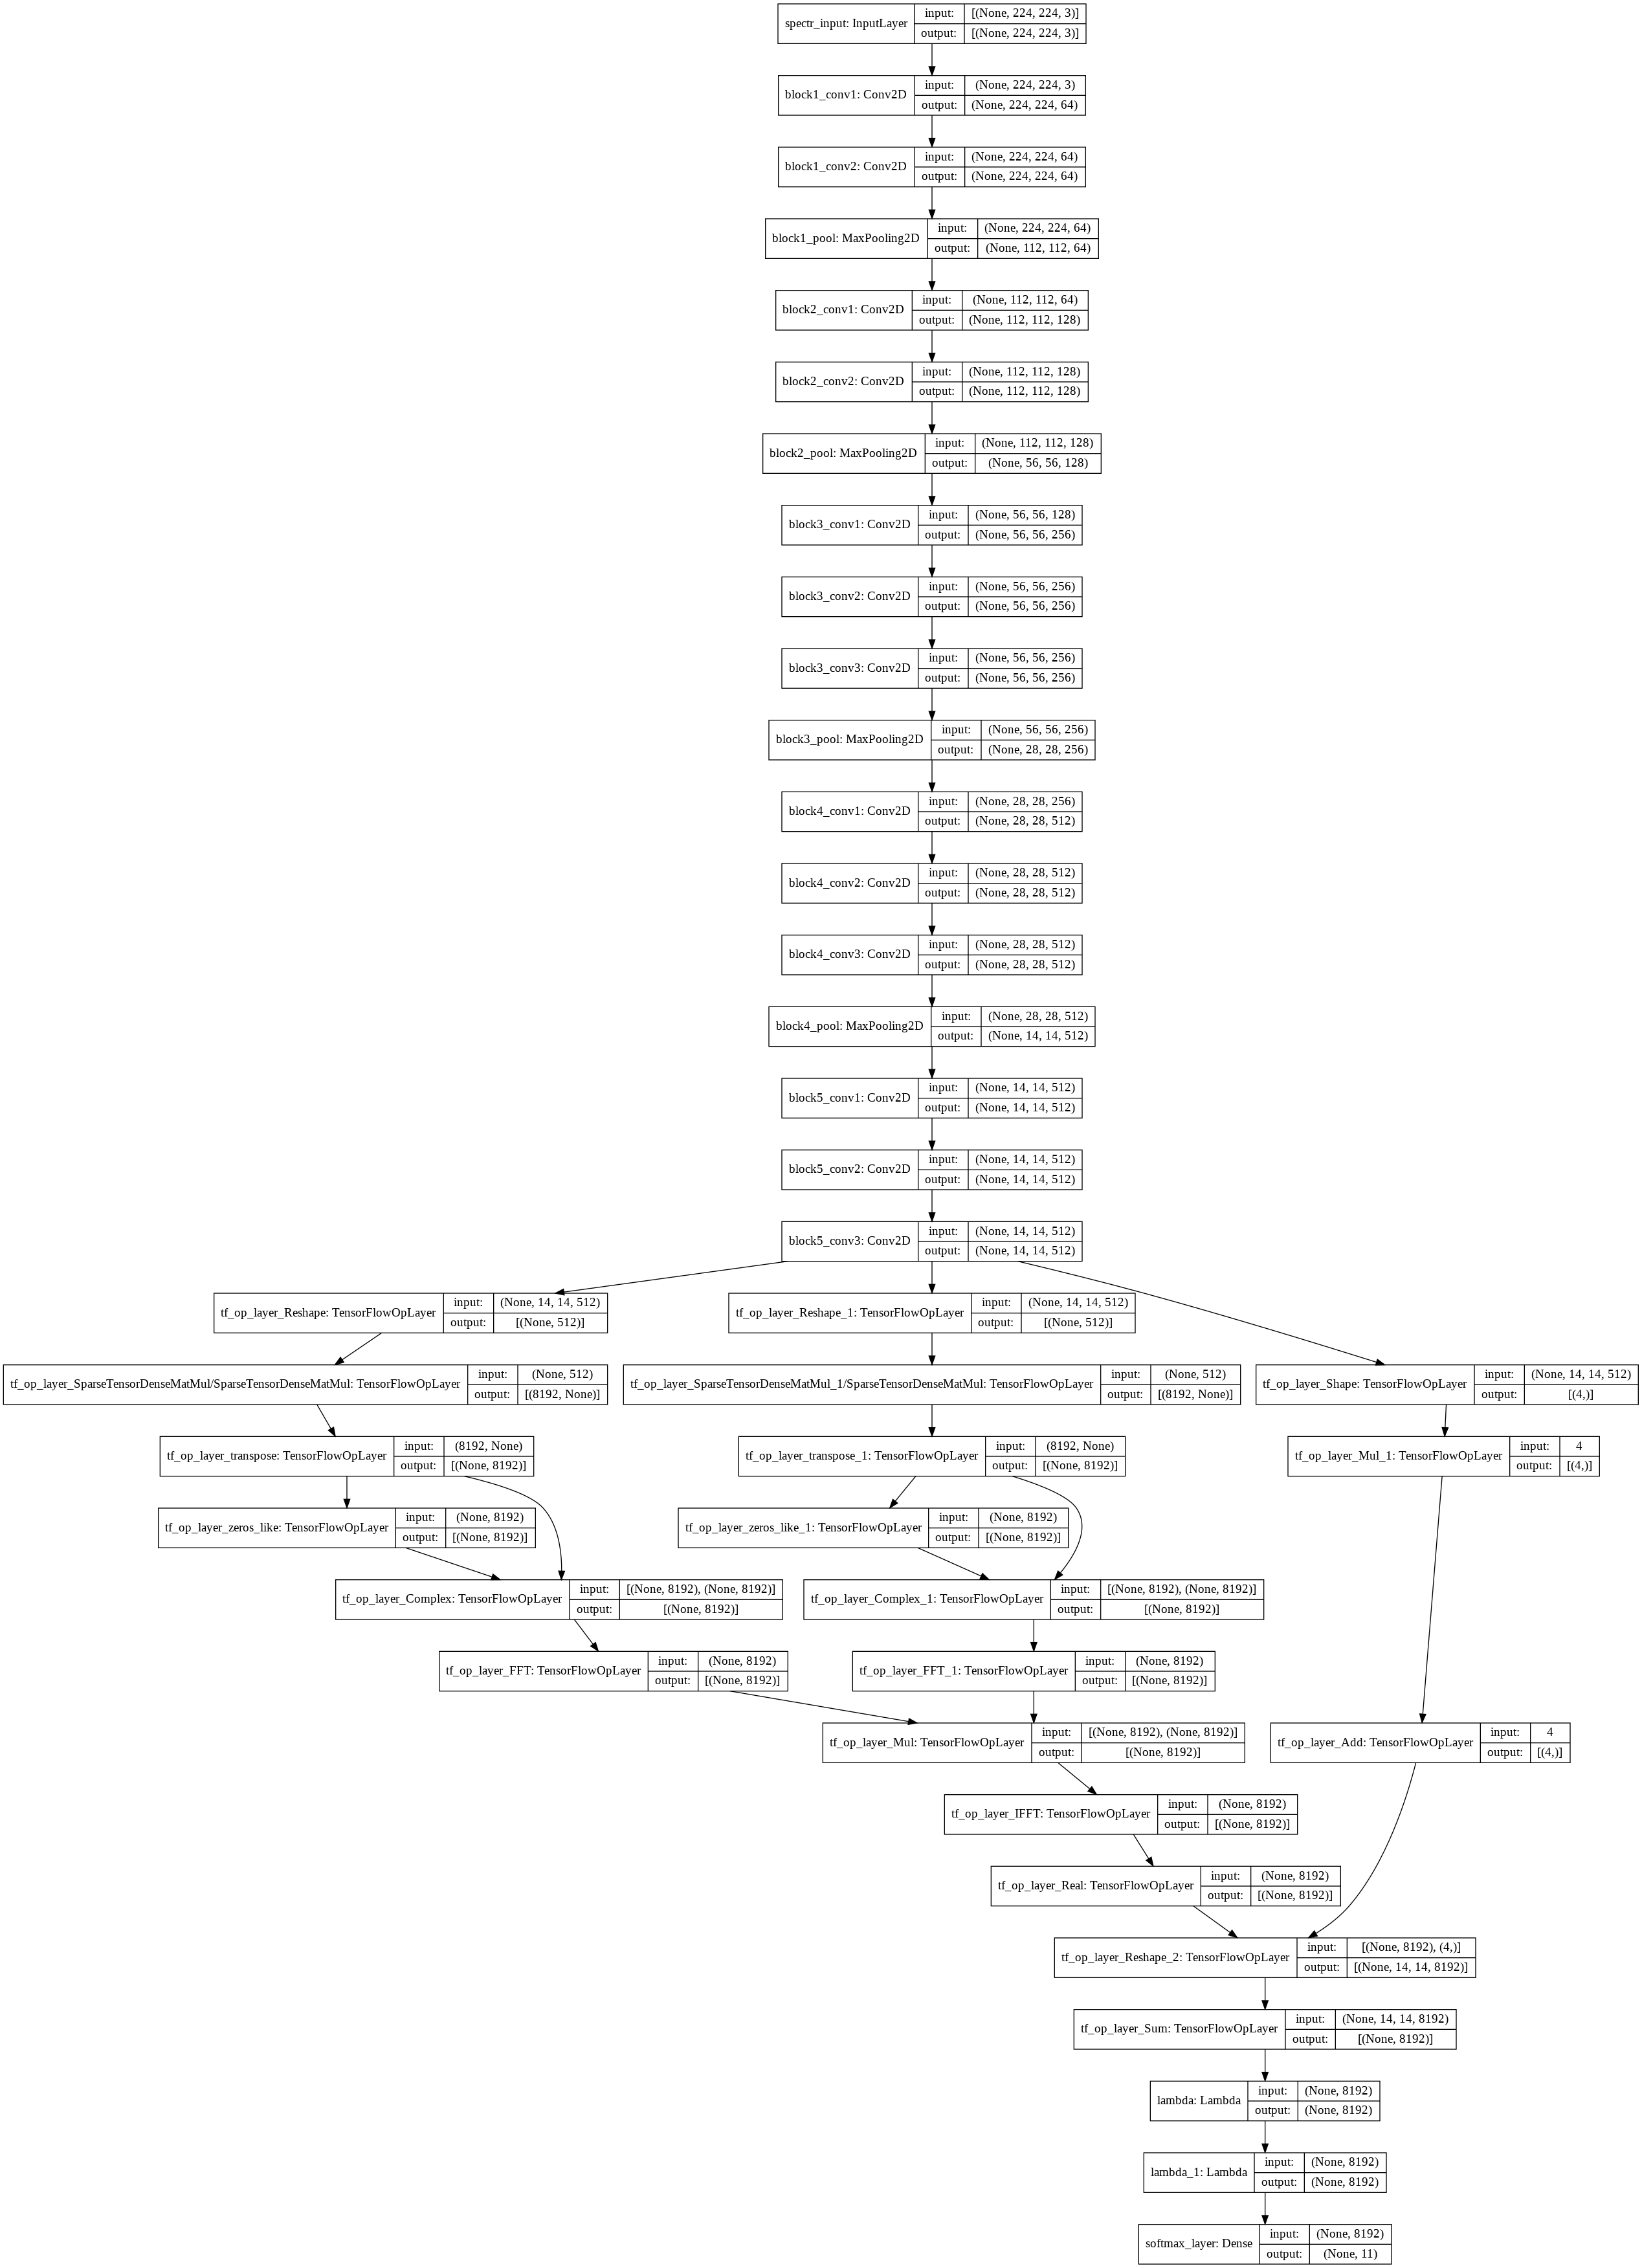

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.vis_utils import plot_model
# model = Sequential()

plot_model(cbcnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Model summary

In [ ]:
cbcnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
spectr_input (InputLayer)       [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        spectr_input[0][0]               
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

##Testing the model on the dataset

In [ ]:
one_hot_labels_test = tf.keras.utils.to_categorical(y_test, num_classes=11)
test_loss,test_acc = cbcnn_model.evaluate(X_test,  one_hot_labels_test, verbose=2)

print('\nTest accuracy:', test_acc*100,"%")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Test accuracy: 100.0 %
